In [2]:
import os
import pickle
import lmdb
import pandas as pd
import numpy as np
from rdkit import Chem
from tqdm import tqdm
from rdkit.Chem import AllChem
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')  
import warnings
warnings.filterwarnings(action='ignore')
from multiprocessing import Pool
from rdkit.Chem import rdDistGeom

In [3]:
def print_failure_causes(counts):
    for i,k in enumerate(rdDistGeom.EmbedFailureCauses.names):
        print(k,counts[i])


In [4]:
m = Chem.MolFromSmiles(r'CCCCCCCCCCCCCCCCCC(=O)N(CCCCCCCCC)C(CCCN(CCCC)CCCC)C(=O)NC12C[C@H]3C[C@H](C[C@H](C3)C1)C2')
mh = Chem.AddHs(m)
ps = rdDistGeom.ETKDGv3()
ps.maxIterations = 5000
ps.randomSeed = 0
ps.trackFailures = True
print(rdDistGeom.EmbedMolecule(mh,ps))
print_failure_causes(ps.GetFailureCounts())

-1
INITIAL_COORDS 5000
FIRST_MINIMIZATION 0
CHECK_TETRAHEDRAL_CENTERS 0
CHECK_CHIRAL_CENTERS 0
MINIMIZE_FOURTH_DIMENSION 0
ETK_MINIMIZATION 0
FINAL_CHIRAL_BOUNDS 0
FINAL_CENTER_IN_VOLUME 0
LINEAR_DOUBLE_BOND 0
BAD_DOUBLE_BOND_STEREO 0


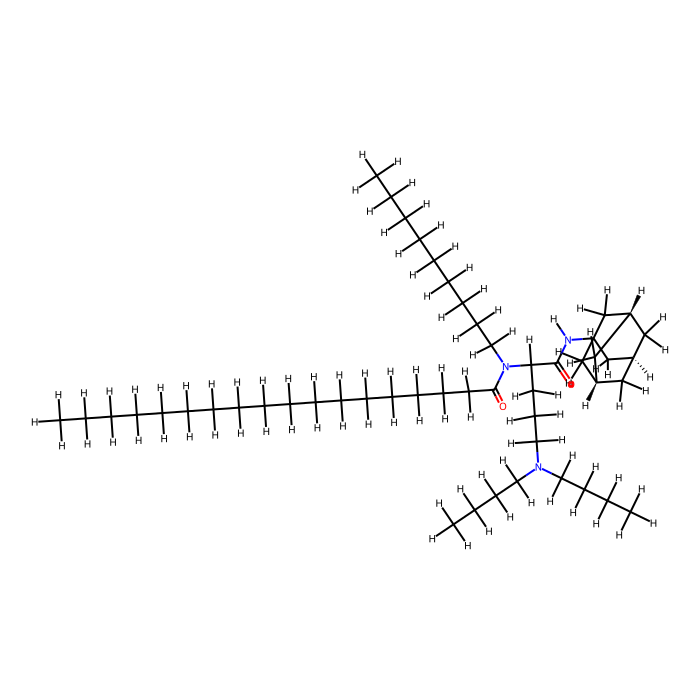

In [6]:
# draw the molecule
from rdkit import Chem

Chem.Draw.MolToImage(mh, size=(700, 700))